## Logistic Regression 

1. <b>the admissions dataset</b>
2.  <b>simple logistic regression </b>
3.  <b>compute the accuracy </b>
4.  <b>testing the model effectivness </b>
5. <b>cross validation </b>
6. <b>Reciever Operator Curve : ROC Curve</b>
7. <b>AUC score</b>

In [1]:
import json
import matplotlib
import warnings
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import cross_validation, metrics
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize


root = r"/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/styles/bmh_matplotlibrc.json"
s = json.load(open(root))
warnings.simplefilter("ignore")
matplotlib.rcParams.update(s)
%matplotlib inline

We will try to predict here if a student will be admit 1 or not 0.

The predictors are $gre$, $gpa$, $rank$

To make it a bit simpler, we will first use just $gpa$ as the predictor 

In [2]:
# import admissions data
root_ = r"/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/data/admissions.csv"
data = pd.read_csv(root_)
admissions = data.copy()
admissions["actual_label"] = admissions["admit"]
admissions.drop("admit", axis = 1)
predictors = ["gpa"]
admissions.head()

,admit,gre,gpa,rank,actual_label
0,0,380,3.61,3,0
1,1,660,3.67,3,1
2,1,800,4.00,1,1
3,1,640,3.19,4,1
4,0,520,2.93,4,0


In [3]:
shuffle_index = np.random.permutation(admissions.index)
shuffle_admissions = admissions.loc[shuffle_index]
train = shuffle_admissions[:300]
test = shuffle_admissions[300:]

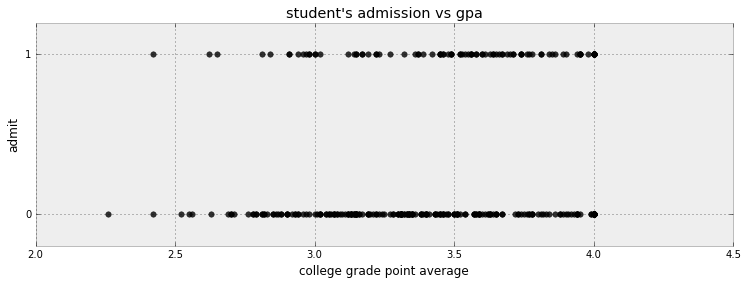

In [4]:
# Plots
figsize(12.5, 4)
plt.scatter(train["gpa"], train["actual_label"], s = 30, color = 'k', alpha = 0.8)
plt.yticks([0, 1])
plt.xlabel("college grade point average")
plt.ylabel("admit")
plt.title("student's admission vs gpa")
plt.savefig("/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/plots/LR0.png");

<center>To describe this dataset [admit], we would need a function $f(gpa)$ which can take the value 0 or 1 : logistic function</center>

$$ f(t) = \frac{1}{1 + e^{\;\beta t}} $$

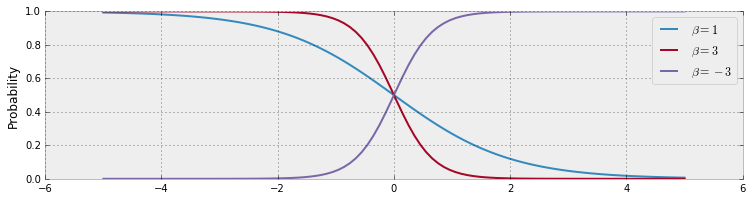

In [5]:
figsize(12.5, 3)

def logistic(x, beta):
    """
    logistic function
    """
    return 1.0 / (1 + np.exp(beta * x))

x = np.linspace(-5, 5, 100)
plt.plot(x, logistic(x, 1), label = r"$\beta = 1$")
plt.plot(x, logistic(x, 3), label = r"$\beta = 3$")
plt.plot(x, logistic(x, -3), label = r"$\beta = -3$")
plt.ylabel("Probability")
plt.legend()
plt.savefig("/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/plots/LR1.png");

In [6]:
## let's try KFold cross validation on the train set

kf = cross_validation.KFold(train.shape[0], 5, shuffle = True, random_state = 8)
_logistic_model =  LogisticRegression()
scores = cross_validation.cross_val_score(_logistic_model, train[predictors], train.actual_label, cv = kf)
scores.mean()

0.69000000000000006

We will use scikit-learn here to perform <b>logistic regression</b>, notice that is similar of performing a <b>linear regression</b>,we just have to use $LinearRegression$ instead of $LogisticRegression$

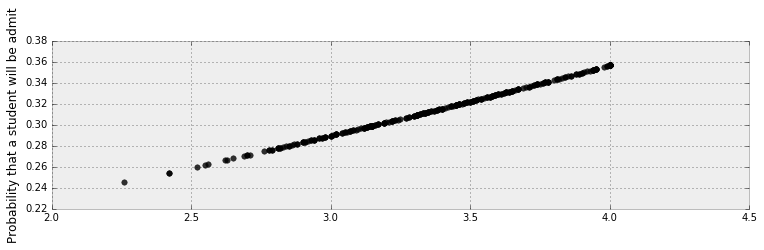

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(train[predictors], train["actual_label"])

# compute the probability of having each class
predict_proba = logistic_model.predict_proba(train[predictors])

plt.scatter(train["gpa"], predict_proba[:, 1], s = 30, color = "k", alpha = 0.8)
plt.ylabel("Probability that a student will be admit")
plt.legend()
plt.savefig("/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/plots/LR2.png");

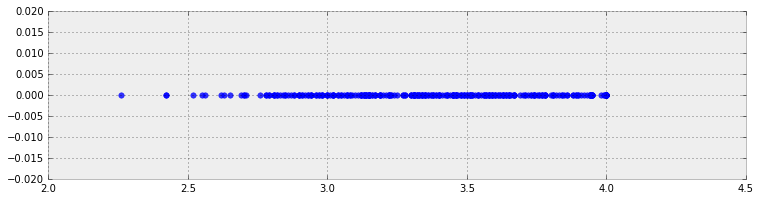

In [8]:
# labels the data
fitted_labels = logistic_model.predict(train[predictors])
train["predicted_labels"] = fitted_labels

plt.scatter(train["gpa"], fitted_labels, s = 30, color = "b", alpha = 0.8)
#plt.yticks([-1, 1])
plt.legend()
plt.savefig("/Users/Kenneth-Aristide/anaconda3/bin/python_prog/ML/plots/LR3.png");

Let's compute the $accuracy$ which is : <b>what fraction of the predictions were correct (actual label match predicted label) </b>
<center> $$ Accuracy = \frac{ Nb-of-Correctly-predicted}{Nb-of-Observation} $$ </center>

Calculating the accuracy of a model on the dataset used for training is a useful initial step just to make sure the model at least beats randomly assigning a label for each observation. However, prediction accuracy doesn't tell us much more.

In [9]:
accuracy = len(train[train.predicted_labels == train.actual_label])/len(train.actual_label)
print(accuracy)

0.69


Now we'll focus on the principles of $evaluating$ $binary$ $classification$ models by testing our model's $effectiveness$ on the training data.
<img src="http://localhost:8888/files/python_prog/ML/img/im1.png/", width = 400/>

Let's now look at a few measures that are much more insightful than simple accuracy. <br>
Let's start with <b>$sensitivity$</b> or <b>True positive Rate</b>:
<img src="http://localhost:8888/files/python_prog/ML/img/im3.png", width = 300/>
This measure help us answer the question :
<b>How effective is this model at identifying positive outcomes?</b> we want a highly sensitive model that is able to catch all the positive cases

In [10]:
true_positive_filter = (train["actual_label"] == 1) & (train["predicted_labels"] == 1)
true_positives = len(train[true_positive_filter])

false_negative_filter = (train["actual_label"] == 1) & (train["predicted_labels"] == 0)
false_negatives = len(train[false_negative_filter])

sensitivity = true_positives / (true_positives + false_negatives)
print(sensitivity)

0.0


Let's compute the $Specificity$ or <b>True Negative Rate</b> :
<b>How effective is this model at identifying negative outcomes?</b>
<img src="http://localhost:8888/files/python_prog/ML/img/im2.png", width = 300/>

In [11]:
true_negative_filter = (train["actual_label"] == 0) & (train["predicted_labels"] == 0)
true_negatives = len(train[true_negative_filter])

false_positive_filter = (train["actual_label"] == 0) & (train["predicted_labels"] == 1)
false_positives = len(train[false_positive_filter])

specificity = true_negatives / (false_positives + true_negatives)
print(specificity)

1.0


### ROC Curve : 
The ROC curve allows us to understand a classification model's performance as the discrimination threshold is varied.<br>
To calculate the TPR and FPR values at each discrimination threshold, we can use the <b>scikit-learn roc_curve</b> function. This function will calculate the false positive rate and true positive rate for varying discrimination thresholds until both reach 0%.<br>
$fpr, tpr, thresholds = metrics.roc_curve(labels, probabilities)$ <br>

When looking at an ROC curve, you want to keep an eye on how the 2 measures trade off and select an appropriate threshold based on your priorities

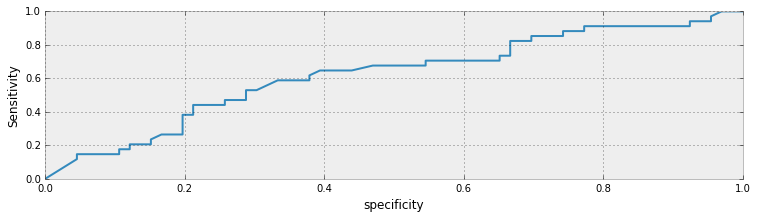

In [12]:
probabilities = logistic_model.predict_proba(test[predictors])
fpr, tpr, thresholds = metrics.roc_curve(test["actual_label"], probabilities[:, 1])


plt.plot(fpr, tpr)
plt.xlabel("specificity")
plt.ylabel("Sensitivity");

Given that the university accepts very few students and rejects most of them, it's probably more concerned with a higher True Positive Rate than a low False Positive Rate. The university benefits the most if it does a wonderful job admitting a select number of students that deserve to be admitted than focusing aggressively on accurately rejecting students.

We can now go one step further and determine the area under the curve or AUC for short. The AUC describes the probability that the classifier will rank a random positive observation higher than a random negative observation. Since randomly guessing converges to a probability of 0.5, the higher the AUC the more accurate the model seems to be.

In [13]:
auc_score = roc_auc_score(test["actual_label"], probabilities[:, 1])
auc_score

0.62277183600713015

With an AUC score of about 63.84%, our model does a little bit better than 50%, which would correspond to randomly guessing, but not as high as the university may like. This could imply that using just one feature in our model, GPA, to predict admissions isn't enough. All of the measures and scores we've learned about are different ways of thinking about accuracy and the important takeaway is that no single measure will tell us if we want to use a specific model or not. Understanding how individual scores are calculated and what they focus on help you converge onto a clearer picture. It's always important to understand what measures are the most important for the problem at hand.